In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import warnings
import h5py
import pandas as pd
import scipy.interpolate as scintrp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import savgol_filter as smooth

import foam
import windPlotting as wPlt
import wind

import winsound

In [3]:
def convertDFSR_out_toNPY(inflDir, sampleName):
    # 
    probes, time, UofT = foam.__readProbe_singleT(inflDir+sampleName+'/Ux','p')
    print('Finished reading UofT')
    _, _, VofT = foam.__readProbe_singleT(inflDir+sampleName+'/Uy','p')
    print('Finished reading VofT')
    _, _, WofT = foam.__readProbe_singleT(inflDir+sampleName+'/Uz','p')
    print('Finished reading WofT')

    UofT = np.transpose(UofT)
    VofT = np.transpose(VofT)
    WofT = np.transpose(WofT)

    np.save(inflDir+sampleName+'/time.npy',time)
    np.save(inflDir+sampleName+'/probes.npy',probes)
    np.save(inflDir+sampleName+'/UofT.npy',UofT)
    np.save(inflDir+sampleName+'/VofT.npy',VofT)
    np.save(inflDir+sampleName+'/WofT.npy',WofT)

    winsound.Beep(1000, 1000)

def saveFoamCaseTH_toFile(caseDir, probeName, H,):
    les_x0 = foam.processVelProfile(caseDir,probeName=probeName,name="___",exportPlots=False, trimTimeSegs=[[0,1.0]],H=H, showLog=False)
    np.save(caseDir+probeName+'_time.npy',les_x0.t)
    np.save(caseDir+probeName+'_Z.npy',les_x0.Z)
    np.save(caseDir+probeName+'_UofT.npy',les_x0.UofT)
    np.save(caseDir+probeName+'_VofT.npy',les_x0.VofT)
    np.save(caseDir+probeName+'_WofT.npy',les_x0.WofT)



In [4]:
raw_wtFile_fine = r"D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\BLWT_tests\2022_08_TTU_WL_BLWT\Data\Profiles\ProcessedData\tngE2Fr1_forPython.mat"
raw_wtFile_med2 = r"D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\BLWT_tests\2022_08_TTU_WL_BLWT\Data\Profiles\ProcessedData\tngE2Mr2_forPython.mat"
raw_wtFile_med3 = r"D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\BLWT_tests\2022_08_TTU_WL_BLWT\Data\Profiles\ProcessedData\tngE2Mr3_forPython.mat"
dir_wtVl_tngE2 = r"D:/tempData_depot/simData_CandC/wt_tngE2/"

lScl=0.02
H = 0.08

# Load the target wind field

The current profile data has already been scaled in Matlab. The cobra probe $U_h$ was around 7 $m/s$.

In [5]:
data = h5py.File(raw_wtFile_fine, 'r')
print(data.keys())
Z = data['Z'][0]
U_TH = np.array(data['UofT']).copy()
V_TH = np.array(data['VofT']).copy()
W_TH = np.array(data['WofT']).copy()
dt = data['dt'][0][0]
wtVel_E2 = wind.profile(name="BLWT-E2 (F)", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=16)
del U_TH, V_TH, W_TH

data = h5py.File(raw_wtFile_med2, 'r')
print(data.keys())
Z = data['Z'][0]
U_TH = np.array(data['UofT']).copy()
V_TH = np.array(data['VofT']).copy()
W_TH = np.array(data['WofT']).copy()
dt = data['dt'][0][0]
wtVel_M2 = wind.profile(name="BLWT-E2 (M2)", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=16)
del U_TH, V_TH, W_TH

data = h5py.File(raw_wtFile_med3, 'r')
print(data.keys())
Z = data['Z'][0]
U_TH = np.array(data['UofT']).copy()
V_TH = np.array(data['VofT']).copy()
W_TH = np.array(data['WofT']).copy()
dt = data['dt'][0][0]
wtVel_M3 = wind.profile(name="BLWT-E2 (M3)", Z=Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt,nSpectAvg=16)
del U_TH, V_TH, W_TH

esdu74_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E2 = wind.ESDU85(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))

wt_vs_ESDU = wind.Profiles([wtVel_E2, wtVel_M2, wtVel_M3, esdu74_E2.toProfileObj(n=np.logspace(-2.5,1.5,100)), esdu85_E2.toProfileObj(n=np.logspace(-2.5,1.5,100))],)


<KeysViewHDF5 ['H', 'README', 'UofT', 'VofT', 'WofT', 'Z', 'dt', 'exposureName']>
<KeysViewHDF5 ['H', 'README', 'UofT', 'VofT', 'WofT', 'Z', 'dt', 'exposureName']>
<KeysViewHDF5 ['H', 'README', 'UofT', 'VofT', 'WofT', 'Z', 'dt', 'exposureName']>


In [6]:
# inflowDir_E2 = dir_wtVl_tngE2+r"inflow/"
# infl_E2 = foam.inflowTuner(H=H, nSpectAvg=32,
#                                 target=wtVel_E2,)

# # convertDFSR_out_toNPY(inflowDir_E2, 'sampledData_inflow1')
# infl_E2.addInflow(caseName=inflowDir_E2, sampleName='sampledData_inflow1', name='inflow1')
# # convertDFSR_out_toNPY(inflowDir_E2, 'sampledData_inflow2')
# infl_E2.addInflow(caseName=inflowDir_E2, sampleName='sampledData_inflow2', name='inflow2')
# # convertDFSR_out_toNPY(inflowDir_E2, 'sampledData_inflow2.2')
# infl_E2.addInflow(caseName=inflowDir_E2, sampleName='sampledData_inflow2.2', name='inflow2.2')
# # # convertDFSR_out_toNPY(inflowDir_E2, 'sampledData_inflow2.3')
# # infl_E2.addInflow(caseName=inflowDir_E2, sampleName='sampledData_inflow2.3', name='inflow2.3')

# infl_E2.addIncident(caseDir=dir_wtVl_tngE2+'tngE2.1/', probeName='sampler.zProfile_x0y0.probes', name='tngE2.1')
# infl_E2.addIncident(caseDir=dir_wtVl_tngE2+'tngE2.2/', probeName='sampler.zProfile_x0y0.probes', name='tngE2.2')
# infl_E2.addIncident(caseDir=dir_wtVl_tngE2+'tngE2.2.2/', probeName='sampler.zProfile_x0y0.probes', name='tngE2.2.2')

# # infl_E2.addIncident(caseDir=dir_wtVl_tngE2+'tngE2.xf.i0.0/', probeName='sampler.zProfile_x0.8y0.probes', name='x=0.8')
# # infl_E2.addIncident(caseDir=dir_wtVl_tngE2+'tngE2.xf.i0.0/', probeName='sampler.zProfile_x2.5y0.probes', name='x=2.5')

In [8]:
inflowDir_E2 = r"D:/tempData_depot/simData_CandC/wt_tngE2_final/tngE2.infl/"

infl_E2 = foam.inflowTuner(H=H, nSpectAvg=32,
                                target=wtVel_E2,)

# convertDFSR_out_toNPY(inflowDir_E2+'tuning/', 'infl.r0')
infl_E2.addInflow(caseName=inflowDir_E2+'tuning/', sampleName='infl.r0', name='DFSR.r0')

infl_E2.addInflow(caseName=dir_wtVl_tngE2+r"inflow/", sampleName='sampledData_inflow1', name='old_DFSR')

infl_E2.addIncident(caseDir=inflowDir_E2+'ED/tngE2.ed.v0/', probeName='prof_x0_y0', name='tngE2.ed.v0', showLog=True)


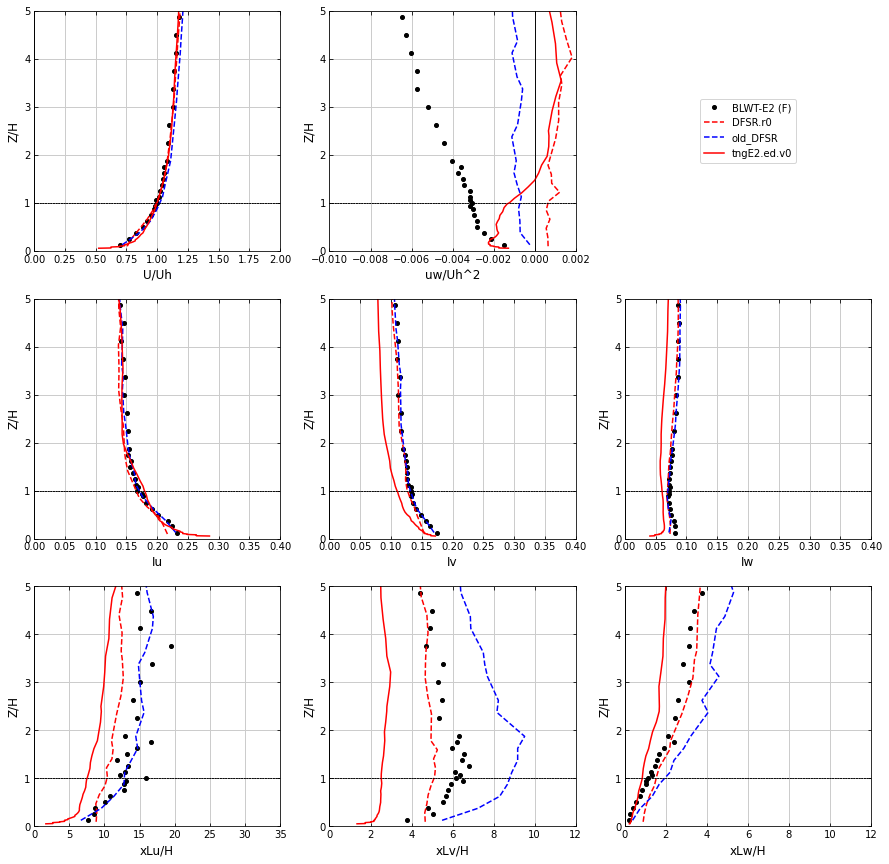

In [10]:
infl_E2.plotProfiles(figsize=[15,15], zLim=[0,5], xLimits_Iu=[0,0.4], xLimits_Iv=[0,0.4], xLimits_Iw=[0,0.4],xLimits_uw=[-1e-2, 0.002], normalize=True,
                     xLimits_xLu=[0, 35], xLimits_xLv=[0,12], xLimits_xLw=[0,12], xLimits_U=[0, 2],
                     ms=4, lw=1.5)

# infl_E2.plotProfiles(figsize=[20,17], zLim=[0,2], normalize=False, 
#                      xLimits_Iu=[0,0.3], xLimits_Iv=[0,0.2], xLimits_Iw=[0,0.2], 
#                     #  xLimits_uw=[-4e-3, 8e-3],
#                     #  xLimits_xLu=[0, 35], xLimits_xLv=[0,12], xLimits_xLw=[0,12], xLimits_U=[0, 1.4],
#                      ms=4, lw=1.5)

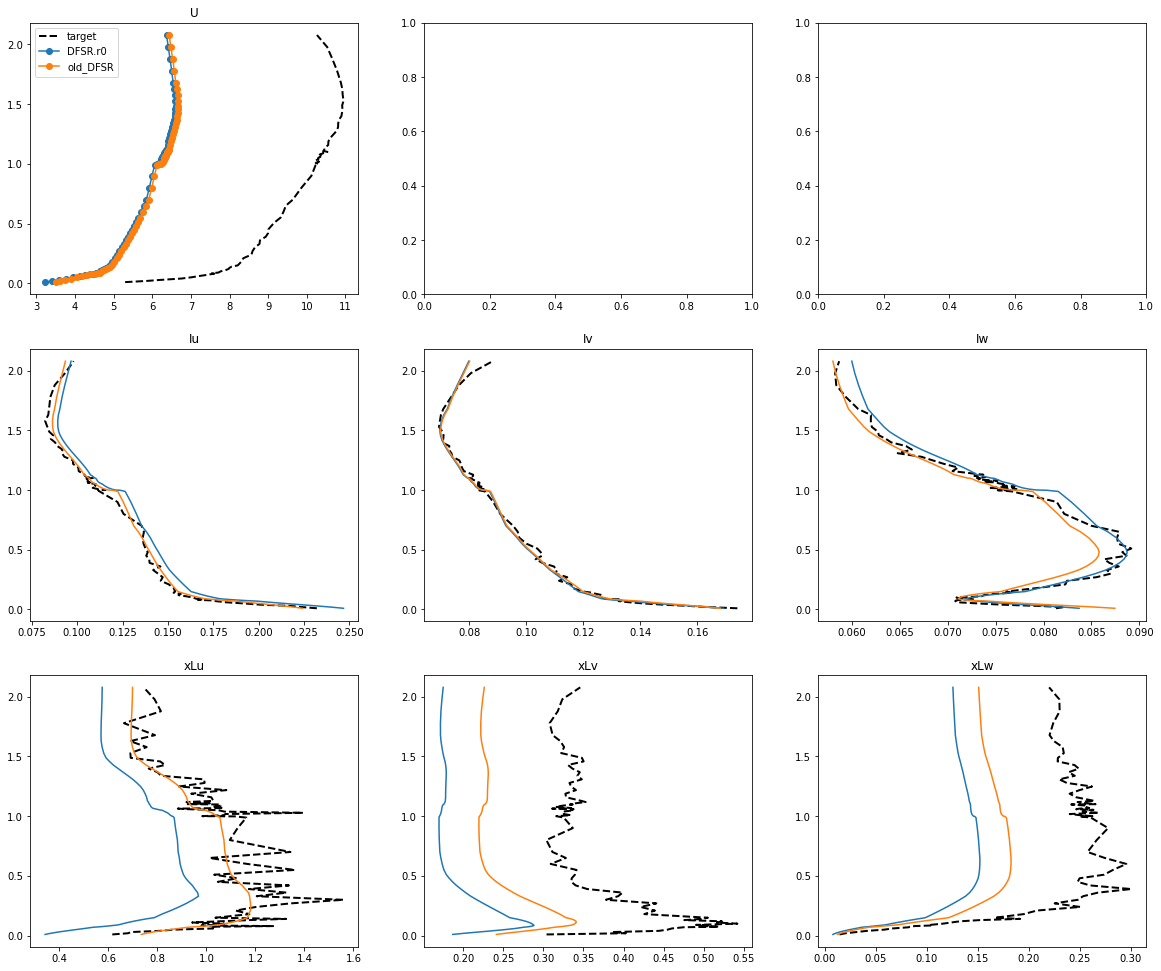

In [30]:
tables, factors, names = infl_E2.getScaledTarget(smoothWindow=16, kwargs_smooth={'window':'hamming', 'mode':'valid'}, LES_useRange_Z=[0, 0.5], scaleByInflow=True)

fig, axs = plt.subplots(3,3, figsize=[20,17])

fld = 'U'
ax = axs.flatten()[0]
ax.plot(wtVel_E2.U, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii], marker='o')
    ax.set_title(fld)
    ax.legend()

fld = 'Iu'
ax = axs.flatten()[3]
ax.plot(wtVel_E2.Iu, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

fld = 'Iv'
ax = axs.flatten()[4]
ax.plot(wtVel_E2.Iv, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

fld = 'Iw'
ax = axs.flatten()[5]
ax.plot(wtVel_E2.Iw, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

fld = 'xLu'
ax = axs.flatten()[6]
ax.plot(wtVel_E2.xLu, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

fld = 'xLv'
ax = axs.flatten()[7]
ax.plot(wtVel_E2.xLv, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

fld = 'xLw'
ax = axs.flatten()[8]
ax.plot(wtVel_E2.xLw, wtVel_E2.Z, label='target', lw=2, ls='--', c='k')
for ii in range(len(tables)):
    ax.plot(tables[ii][fld], tables[ii]['Z'], label=names[ii])
    ax.set_title(fld)

plt.show()

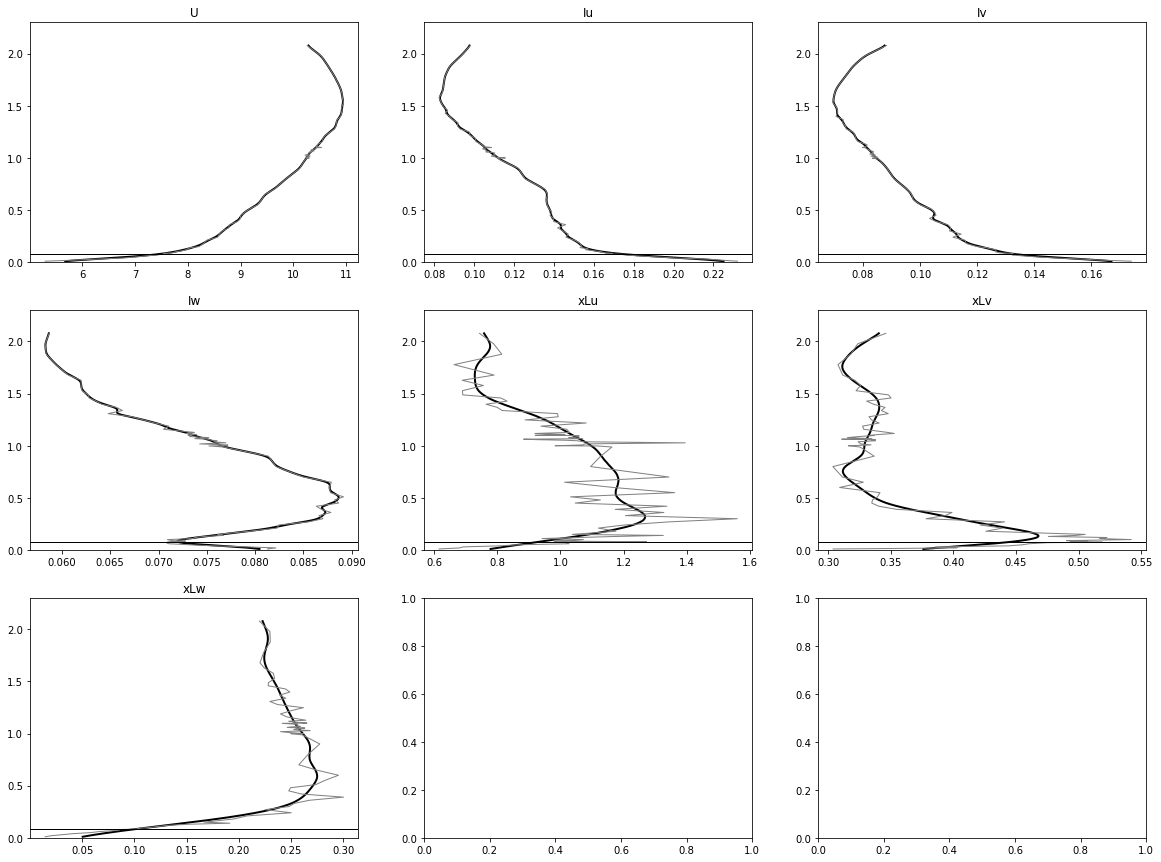

In [47]:
# target = infl_E2.targetProfileTable(smoothWindow=50, castToUniform=True, kwargs_smooth={'window':'hamming', 'mode':'valid', 'usePadding':True, 
#                                                                                         'paddingFactor':2, 'paddingMode':'edge'})
target = infl_E2.targetProfileTable(smoothWindow=[50, 50, 50, 50, 200, 150, 200], castToUniform=True, kwargs_smooth={'window':'hamming', 'mode':'valid', 'usePadding':True, 
                                                                                        'paddingFactor':2, 'paddingMode':'edge'})
flds = ['U', 'Iu', 'Iv', 'Iw', 'xLu', 'xLv', 'xLw']

caseDir = r"D:/tempData_depot/simData_CandC/wt_tngE2_final/tngE2.infl/constant/boundaryData/sampledData/"
target.to_csv(caseDir+'profile', index=False, sep=' ', float_format='%.6e', header=False)

fig, axs = plt.subplots(3,3, figsize=[20,15])
axs = axs.flatten() 
for ii in range(len(flds)):
    axs[ii].plot(target[flds[ii]], target['Z'], label='target', lw=2, ls='-', c='k')
    axs[ii].plot(getattr(wtVel_E2,flds[ii]), wtVel_E2.Z, label='target', lw=1, ls='-', c='grey')
    axs[ii].axhline(0.08, c='k', lw=1)
    axs[ii].set_title(flds[ii])
    axs[ii].set_ylim([0,2.3])
    # axs[ii].legend()

In [60]:
print(wtVel_E2.stat_at_H('xLw'))

0.0883510441786947
